In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def extract_polynomial_features(X, k):
    """
    Generate a matrix of polynomial features for a given input vector X.
    
    This function creates a matrix where each row corresponds to the powers of 
    the elements in the input vector `X`, up to degree `k-1`. The first column 
    is a bias term (all ones), followed by the original input vector, its square, 
    its cube, and so on, up to the specified polynomial degree.
    
    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input features (e.g., [x1, x2, x3, ...]).
        
    k : int
        The maximum degree of the polynomial features (inclusive of 1 but exclusive of k). 
        For example, if k = 4, the resulting features will include [1, X, X^2, X^3].
        
    Returns:
    -------
    ndarray
        A 2D numpy array where each row contains the polynomial features for the 
        corresponding element of `X`. The shape of the output array is `(len(X), k)`.
        
        Example:
            If X = [x1, x2, x3] and k = 4, the output will be:
            [[1, x1, x1^2, x1^3],
             [1, x2, x2^2, x2^3],
             [1, x3, x3^2, x3^3]]
    """
    # Initialize a list to hold the feature columns. 
    # The first column is a bias term, which is an array of ones.
    features = [np.ones_like(X)]

    # Generate polynomial terms for degrees from 1 to k-1
    for degree in range(1, k):
        # Append the input vector raised to the current degree
        features.append(np.power(X, degree))

    # Concatenate the features along the second axis to form the final matrix
    return np.concatenate(features, axis=1)


In [9]:
def hat_w(X, y, k):
    """
    Compute the best weight for a regression model.
    
    This function calculates the weights `w` for a regression model 
    using the normal equation: 
        w = (ΦᵀΦ)^(-1)Φᵀy
    where:
        - `Φ` is the design matrix of polynomial features generated from `X`
        - `y` is the target vector
        - `w` is the vector of weights that minimizes the mean squared error.
    
    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input features (e.g., [x1, x2, x3, ...]).
    
    y : ndarray
        A 1D numpy array of target values corresponding to the input features.
    
    k : int
        The maximum degree of the polynomial features (inclusive of 1 but exclusive of k). 
        Determines the order of the polynomial model.
    
    Returns:
    -------
    ndarray
        A 1D numpy array containing the computed weights `w`. The size of `w` is equal to `k`, 
        corresponding to the number of polynomial terms (including the bias term).
    
    Example:
        If X = [x1, x2, x3], y = [y1, y2, y3], and k = 3, 
        this function returns the weights for a quadratic polynomial regression model.
    """
    # Generate the design matrix Φ using polynomial features from input X
    phi = extract_polynomial_features(X, k)
    
    # Solve the normal equation to compute the weights w
    # w = (ΦᵀΦ)^(-1)Φᵀy
    w = np.linalg.solve(phi.T @ phi, phi.T @ y)
    
    # Return the computed weight vector
    return w


In [10]:
def predict_polynomial(X, w, k):
    """
    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input features (e.g., [x1, x2, x3, ...]).
    
    w : ndarray
        A 1D numpy array of weights computed from the regression model. 
        The length of `w` should match the number of polynomial terms, i.e., `k`.
    
    k : int
        The maximum degree of the polynomial features (inclusive of 1 but exclusive of k).
        Determines the order of the polynomial model.
    
    Returns:
    -------
    ndarray
        A 1D numpy array of predicted values for the input `X`.
    
    """
    # Generate the design matrix Φ using polynomial features from input X
    phi = extract_polynomial_features(X, k)
    
    # Compute the predictions as the dot product of Φ and w
    return phi @ w


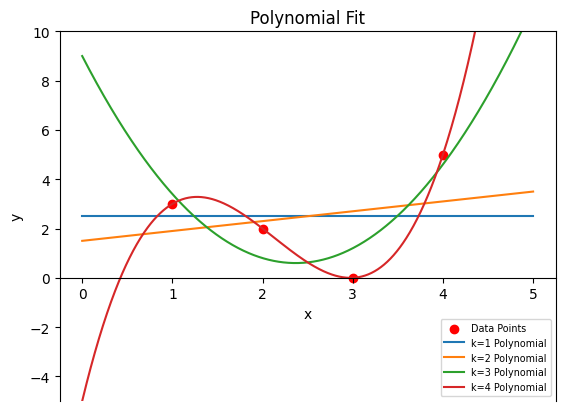

In [11]:
# Input data (features and target values)
X = np.array([[1],
              [2],
              [3],
              [4]])

y = np.array([[3],
              [2],
              [0],
              [5]])

# Compute weights for different polynomial degrees
hat_w_constant = hat_w(X, y, 1)
hat_w_linear = hat_w(X, y, 2)
hat_w_quadratic = hat_w(X, y, 3)
hat_w_cubic = hat_w(X, y, 4)

# Generate a range of x values for plotting smooth fitted curves
x_range = np.linspace(min(X) - 1, max(X) + 1, 1000).reshape(-1, 1)

# Scatter plot of the original data points
plt.scatter(X, y, color='red', label='Data Points')

for k in [1, 2, 3, 4]:
    w = hat_w(X, y, k)
    y_fitted = predict_polynomial(x_range, w, k)
    
    plt.plot(x_range, y_fitted, label=f'k={k} Polynomial')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit')
plt.legend(fontsize='x-small')

# Set axis styles (placing x-axis at y=0)
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
plt.ylim((-5, 10))

# Display the plot
plt.show()


In [ ]:
# Function to print the equations
def print_equation(coefficients, degree):
    terms = []
    
    for i in range(degree, -1, -1):
        coeff = coefficients[i]
        
        if coeff != 0:
            if i == 0:
                terms.append(f"{coeff:.2f}")
            elif i == 1:
                terms.append(f"{coeff:.2f}x")
            else:
                terms.append(f"{coeff:.2f}x^{i}")
    
    equation = " + ".join(terms)
    equation = equation.replace(" + -", " − ")
    return "y = " + equation

print("(K=1) Constant model equation: ", print_equation(hat_w_constant.flatten(), 0))
print("(K=2) Linear model equation: ", print_equation(hat_w_linear.flatten(), 1))
print("(K=3) Quadratic model equation: ", print_equation(hat_w_quadratic.flatten(), 2))
print("(K=4) Cubic model equation: ", print_equation(hat_w_cubic.flatten(), 3))

(K=1) Constant model equation:  y = 2.50
(K=2) Linear model equation:  y = 0.40x + 1.50
(K=3) Quadratic model equation:  y = 1.50x^2 − 7.10x + 9.00
(K=4) Cubic model equation:  y = 1.33x^3 − 8.50x^2 + 15.17x − 5.00


In [12]:
def calculate_mse(y_actual, y_pred):
    """
    Parameters:
    ----------
    y_actual : ndarray
        A 1D numpy array of actual target values.
    
    y_pred : ndarray
        A 1D numpy array of predicted values.
    
    Returns:
    -------
    float
        The Mean Squared Error (MSE) between `y_actual` and `y_pred`.
    """
    return np.mean((y_actual - y_pred)**2)

# Calculate predictions for each polynomial model
y_pred_constant = predict_polynomial(X, hat_w_constant.flatten(), 1)
y_pred_linear = predict_polynomial(X, hat_w_linear.flatten(), 2)
y_pred_quadratic = predict_polynomial(X, hat_w_quadratic.flatten(), 3) 
y_pred_cubic = predict_polynomial(X, hat_w_cubic.flatten(), 4)

# Compute Mean Squared Error (MSE) for each model
mse_constant = calculate_mse(y.flatten(), y_pred_constant)
mse_linear = calculate_mse(y.flatten(), y_pred_linear)
mse_quadratic = calculate_mse(y.flatten(), y_pred_quadratic)
mse_cubic = calculate_mse(y.flatten(), y_pred_cubic)

# Print the MSE results for each model
print(f"(K=1) Constant Model MSE: {mse_constant:.4g}")
print(f"(K=2) Linear Model MSE: {mse_linear:.4g}")
print(f"(K=3) Quadratic Model MSE: {mse_quadratic:.4g}")
print(f"(K=4) Cubic Model MSE: {mse_cubic:.4g}")


(K=1) Constant Model MSE: 3.25
(K=2) Linear Model MSE: 3.05
(K=3) Quadratic Model MSE: 0.8
(K=4) Cubic Model MSE: 4.004e-26
